# Entrega Nº4

## Dataset Flights

Javier Ceferino Rodriguez
Maria Eva Ortega 
Julio Gonzalez
Gonzalo Estevez

## Introduccion

En el siguiente trabajo analizamos el dataset de vuelos con el objetivo de reforzar las trayectorias con mas demanda para lograr aumentar las ganancias y mejorar la experiencia de los pasajeros.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams.update({'font.size': 16})

In [3]:
def read_dataset(file_name):
    """
    Lee un archivo csv y lo devuelve como un DataFrame
    """
    return pd.read_csv(file_name, index_col=0)

df = read_dataset('./data/flights.csv')
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [4]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [5]:
df.dropna(subset=['dep_delay', 'arr_delay'], inplace=True)
df.isna().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [6]:
df["origin"].value_counts()

EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

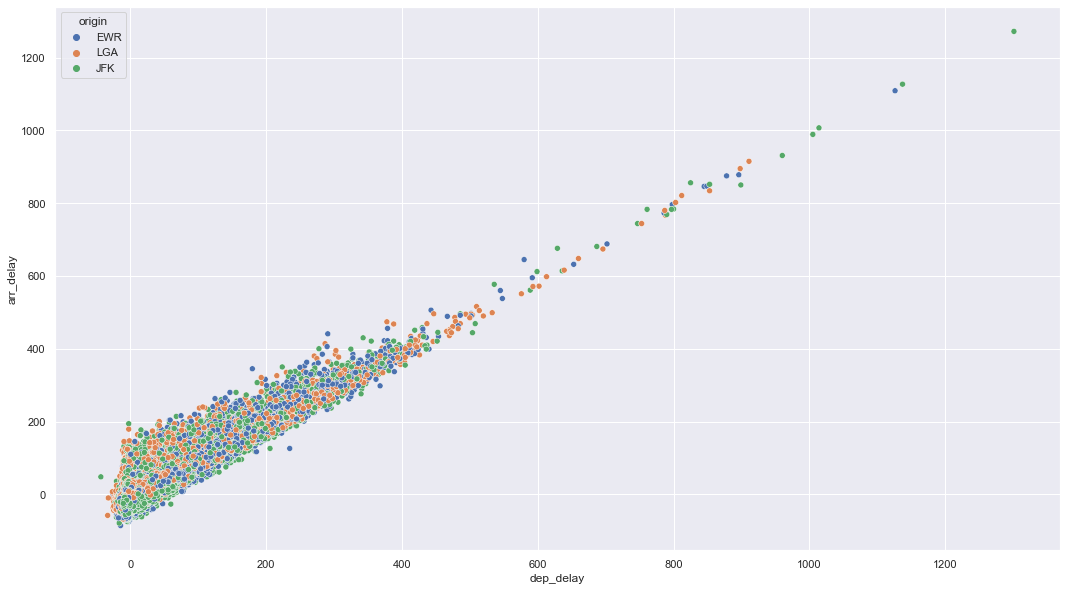

In [8]:
sns.set(rc={'figure.figsize': (18, 10)})
sns.scatterplot(
    data=df,
    x="dep_delay",
    y="arr_delay",
    hue="origin"
);

In [11]:
regresion_lineal = LinearRegression()
max_delay = np.array(df["arr_delay"]) # Y
min_delay = np.array(df["dep_delay"]).reshape(-1, 1) # X
regresion_lineal.fit(X=min_delay, y=max_delay)

print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

max_delay_pred = regresion_lineal.predict(min_delay)
mse = mean_squared_error(y_true=max_delay, y_pred=max_delay_pred)
rmse = np.sqrt(mse) # La raíz cuadrada del MSE es el RMSE

print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

r2 = regresion_lineal.score(min_delay, max_delay)
print('Coeficiente de Determinación R2 = ' + str(r2))

w = [1.01909292], b = -5.89949347708382
Error Cuadrático Medio (MSE) = 324.98707096914626
Raíz del Error Cuadrático Medio (RMSE) = 18.027397786956005
Coeficiente de Determinación R2 = 0.8368640876099875


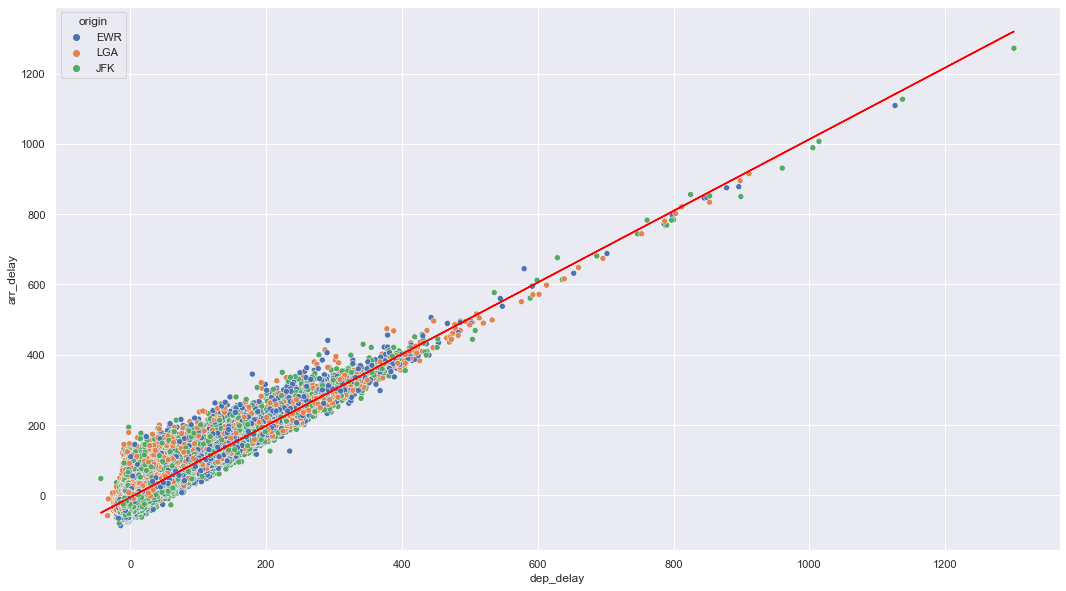

In [12]:
sns.set(rc={'figure.figsize': (18, 10)})
sns.scatterplot(
    data=df,
    x="dep_delay",
    y="arr_delay",
    hue="origin"
)
plt.plot(min_delay, max_delay_pred, color='red')
plt.show()

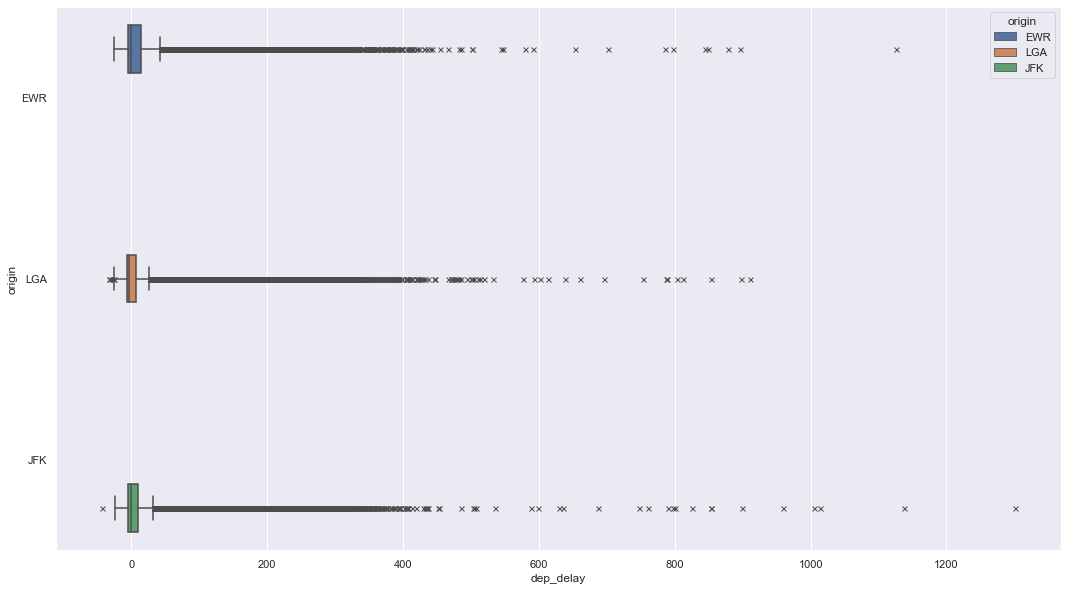

In [23]:
sns.boxplot(
    data=df,
    x="dep_delay",
    y="origin",
    hue="origin",
    flierprops={"marker": "x"}
);

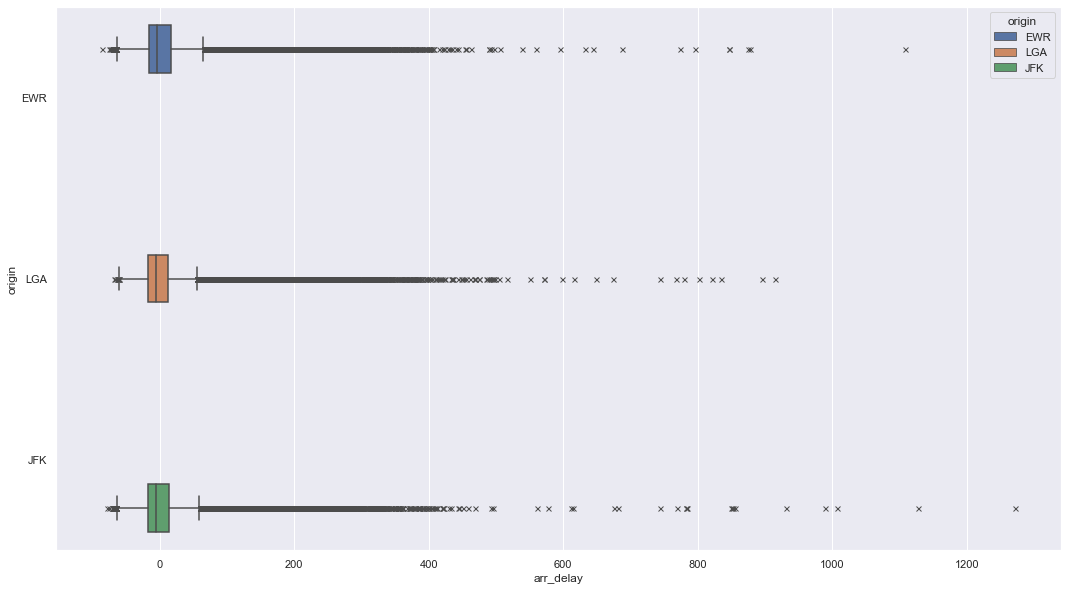

In [22]:
sns.boxplot(
    data=df,
    x="arr_delay",
    y="origin",
    hue="origin",
    flierprops={"marker": "x"}
);